Note: you may need to restart the kernel to use updated packages.


In [2]:
import gzip
import networkx as nx
import matplotlib.pyplot as plt

# Ścieżka do skompresowanego pliku GZ
gz_file_path = 'data.gz'

# Rozpakowanie pliku GZ i zapisanie do tymczasowego pliku (lub bezpośrednio do pamięci)
with gzip.open(gz_file_path, 'rb') as f:
    # Odczytanie danych i zapisanie do zmiennej
    content = f.read()

# Teraz zapisujemy zawartość do pliku tymczasowego (np. 'temp_graph.gexf')
with open('temp_graph.gexf', 'wb') as temp_file:
    temp_file.write(content)

# Wczytanie grafu z tymczasowego pliku GEXF
G = nx.read_gexf('temp_graph.gexf')



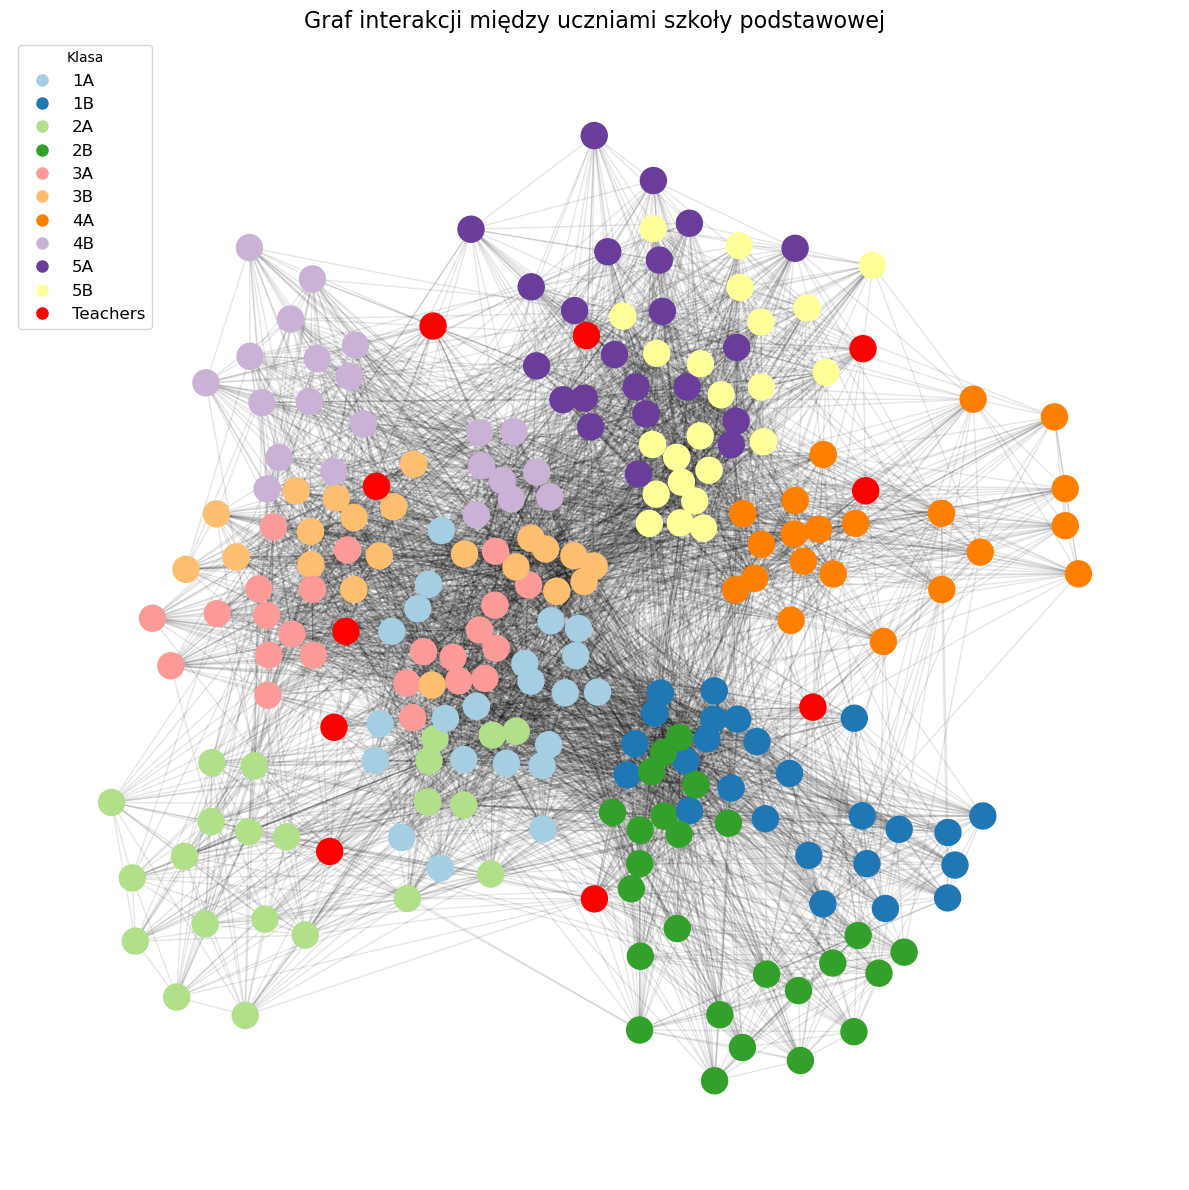

In [38]:
import networkx as nx
import random
import matplotlib.pyplot as plt


seed = 256

# Tworzenie układu
pos = nx.spring_layout(G, k=1, iterations=200,seed=256) 

# Przypisanie unikalnych kolorów do klas (classname)

color_palette = plt.cm.Paired  # Wyrazista paleta kolorów (Set1, Set2, tab10, etc.)
class_names = set(nx.get_node_attributes(G, 'classname').values())  # Pobieramy wszystkie wartości 'classname'
class_colors = {classname: color_palette(i / max(len(class_names) - 1, 1)) for i, classname in enumerate(sorted(class_names))}

# Zmieniamy kolor klasy 'Teachers' na czerwony
class_colors['Teachers'] = 'red'  # Ustawiamy kolor czerwony dla klasy 'Teachers'

# Inicjalizacja koloru węzłów
node_color = {}

# Dla każdego węzła przypisz kolor na podstawie klasy
for node in G.nodes():
    classname = G.nodes[node].get('classname', 'Unknown')  # Jeśli brak klasy, przypisuje 'Unknown'
    node_color[node] = class_colors.get(classname, 'grey')  # Kolor w zależności od klasy, domyślnie 'grey'

# Rysowanie grafu
plt.figure(figsize=(12, 12))

# Rysowanie węzłów
nx.draw_networkx_nodes(G, pos, node_size=350, node_color=[node_color[node] for node in G.nodes()], node_shape='o')

# Rysowanie krawędzi
nx.draw_networkx_edges(G, pos, width=1, alpha=0.1)

# Przygotowanie legendy
class_legend = [mlines.Line2D([0], [0], marker='o', color='w', label=classname, markerfacecolor=color, markersize=10) 
                for classname, color in sorted(class_colors.items())]

# Dodanie legendy do wykresu
plt.legend(handles=class_legend, loc='upper left', fontsize=12,title="Klasa")

# Dodatkowe opcje
plt.title("Graf interakcji między uczniami szkoły podstawowej", fontsize=16)
plt.axis('off')  # Ukrywa osie

# Zwiększenie rozdzielczości wykresu
plt.tight_layout()
plt.savefig('graf.png')

plt.show()

